In [1]:
""""
functionnal connectivity channel to channel on all signal

"""

'"\nfunctionnal connectivity channel to channel (network with the stimulus informatin)\n\n'

In [1]:
import lib.cnn.matnpyio as io
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
import collections
import pandas as pd

In [15]:

only_correct_trials = False




lowcut1, highcut1, order1 = 8, 14, 3

lowcut2, highcut2, order2 = 8, 14, 3

window_size1 = 200
window_size2 = window_size1 #window_size1 ### 0.72
step = 100
delay = 0

str_freq1 = 'low'+str(lowcut1)+'high'+str(highcut1)+'order'+str(order1)
str_freq2 = 'low'+str(lowcut2)+'high'+str(highcut2)+'order'+str(order2)


In [5]:
file_name = '/home/rudy/Python2/predictogram/tuning/' + 'tuning_channel_to_channel.csv'


df = pd.read_csv(file_name)

In [6]:
df

,session,area1,num1,area2,num2,cortex1,cortex2,str_freq1,str_freq2,window_size1,...,nonlin,fc_conv,fc_central,fc_deconv,n_layers,channels_in,channels_out,normalized_weights,weights_dist,renorm
0,150128,DP,0,DP,0,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
1,150128,DP,0,DP,1,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
2,150128,DP,0,DP,2,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
3,150128,DP,0,DP,3,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
4,150128,DP,0,MT,0,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
5,150128,DP,0,V1,0,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
6,150128,DP,0,V1,1,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
7,150128,DP,0,V1,2,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
8,150128,DP,0,V1,3,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
9,150128,DP,0,V1,4,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True


In [7]:
df.keys()

Index(['session', 'area1', 'num1', 'area2', 'num2', 'cortex1', 'cortex2',
       'str_freq1', 'str_freq2', 'window_size1', 'window_size2', 'step',
       'n_trial', 'data_size', 'n_chans1', 'n_chans2', 'only_correct_trials',
       'only_align_on_available', 'mse_test', 'mse_train', 'var(y_test)',
       'r2_test', 'r2_error_bar', 'var-mse', 'R2_time', 'time', 'n_iterations',
       'n_epochs', 'size_of_batches', 'learning_rate', 'l2',
       'l2_regularization_penalty', 'kpt', 'keep_prob_train', 'bn', 'DECAY',
       'patch_dim', 'pool_dim', 'nonlin', 'fc_conv', 'fc_central', 'fc_deconv',
       'n_layers', 'channels_in', 'channels_out', 'normalized_weights',
       'weights_dist', 'renorm'],
      dtype='object')

In [8]:
df['only_correct_trials']

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
331    False
332    False
333    False
334    False
335    False
336    False
337    False
338    False
339    False
340    False
341    False
342    False
343    False
344    False
345    False
346    False
347    False
348    False
349    False
350    False
351    False
352    False
353    False
354    False
355    False
356    False
357    False
358    False
359    False
360    False
Name: only_correct_trials, Length: 361, dtype: bool

In [10]:
print(np.unique(df['cortex1']))
print(np.unique(df['cortex2']))

print(np.unique(df['str_freq1']))
print(np.unique(df['str_freq2']))

['Visual']
['Visual']
['low8high14order3']
['low8high14order3']


In [12]:
cortex1 = 'Visual'
cortex2 = 'Visual'

In [184]:
df.keys()

Index(['session', 'area1', 'num1', 'area2', 'num2', 'cortex1', 'cortex2',
       'interval1', 'interval2', 'str_freq1', 'str_freq2', 'window_size1',
       'window_size2', 'step', 'delay', 'len(ind_test)', 'len(ind_train)',
       'n_chans1', 'n_chans2', 'only_correct_trials', 'mse_test', 'mse_train',
       'np.var(y_test)', 'R2_test', 'var-mse', 'R2_time', 'n_iterations',
       'n_epochs', 'size_of_batches', 'learning_rate', 'l2',
       'l2_regularization_penalty', 'kpt', 'keep_prob_train', 'bn', 'DECAY',
       'patch_dim', 'pool_dim', 'nonlin', 'fc_conv', 'fc_central', 'fc_stim',
       'fc_deconv', 'n_layers', 'channels_in', 'channels_out',
       'normalized_weights', 'weights_dist', 'renorm'],
      dtype='object')

In [16]:
df_cortex = df[(df['cortex1'] == cortex1) & (df['cortex2'] == cortex2) & (df['str_freq1'] == str_freq1) & (df['str_freq2'] == str_freq2)]


In [17]:
df_cortex

,session,area1,num1,area2,num2,cortex1,cortex2,str_freq1,str_freq2,window_size1,...,nonlin,fc_conv,fc_central,fc_deconv,n_layers,channels_in,channels_out,normalized_weights,weights_dist,renorm
0,150128,DP,0,DP,0,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
1,150128,DP,0,DP,1,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
2,150128,DP,0,DP,2,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
3,150128,DP,0,DP,3,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
4,150128,DP,0,MT,0,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
5,150128,DP,0,V1,0,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
6,150128,DP,0,V1,1,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
7,150128,DP,0,V1,2,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
8,150128,DP,0,V1,3,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True
9,150128,DP,0,V1,4,Visual,Visual,low8high14order3,low8high14order3,200,...,leaky_relu,50,20,50,3,"[1, 6, 9]","[6, 9, 12]",True,random_normal,True


In [19]:
base_path = '/media/rudy/disk2/lucy/'
sess_no ='150128'
rinfo_path = base_path +sess_no+'/session01/' + 'recording_info.mat'

In [20]:
import collections

In [21]:
collections.Counter(io.get_area_cortex(rinfo_path, cortex1, unique = False))

Counter({'MT': 1, 'DP': 4, 'V6A': 2, 'V2': 4, 'V1': 8})

In [22]:
areas = np.unique(df_cortex['area1'].values)


In [23]:
df_cortex.keys()

Index(['session', 'area1', 'num1', 'area2', 'num2', 'cortex1', 'cortex2',
       'str_freq1', 'str_freq2', 'window_size1', 'window_size2', 'step',
       'n_trial', 'data_size', 'n_chans1', 'n_chans2', 'only_correct_trials',
       'only_align_on_available', 'mse_test', 'mse_train', 'var(y_test)',
       'r2_test', 'r2_error_bar', 'var-mse', 'R2_time', 'time', 'n_iterations',
       'n_epochs', 'size_of_batches', 'learning_rate', 'l2',
       'l2_regularization_penalty', 'kpt', 'keep_prob_train', 'bn', 'DECAY',
       'patch_dim', 'pool_dim', 'nonlin', 'fc_conv', 'fc_central', 'fc_deconv',
       'n_layers', 'channels_in', 'channels_out', 'normalized_weights',
       'weights_dist', 'renorm'],
      dtype='object')

In [25]:
target1 = collections.Counter(io.get_area_cortex(rinfo_path, cortex1, unique = False))
target2 = collections.Counter(io.get_area_cortex(rinfo_path, cortex2, unique = False))

label1 = []
for area1 in target1 :
    for count1 in range(target1[area1]):
        label1.append(area1)
        
label2 = []
for area2 in target2 :
    for count2 in range(target2[area2]):
        label2.append(area2)
        
print(label1)
print(label2)

print(len(label1))
print(len(label2))

FC = np.zeros( (len(label1), len(label2)))

i=0

for area1 in target1 :
    for count1 in range(target1[area1]):
        j=0
        for area2 in target2 :
            for count2 in range(target2[area2]):
                
                r = df_cortex[ (df_cortex['area1'] == area1) & (df_cortex['num1'] == count1) & (df_cortex['area2'] == area2) & (df_cortex['num2'] == count2)]['r2_test'].values
                if len(r) > 0 :
                    #print(i,j)
                    FC[i,j] = r[0]
    
                else :
                    print(area1, area2)
                    
                
                j+=1
        i+=1
                
                
        


['MT', 'DP', 'DP', 'DP', 'DP', 'V6A', 'V6A', 'V2', 'V2', 'V2', 'V2', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1']
['MT', 'DP', 'DP', 'DP', 'DP', 'V6A', 'V6A', 'V2', 'V2', 'V2', 'V2', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1']
19
19


In [26]:
FC.shape

(19, 19)

from  Visual to  Visual
from  8 - 14  to  8 - 14 Hz


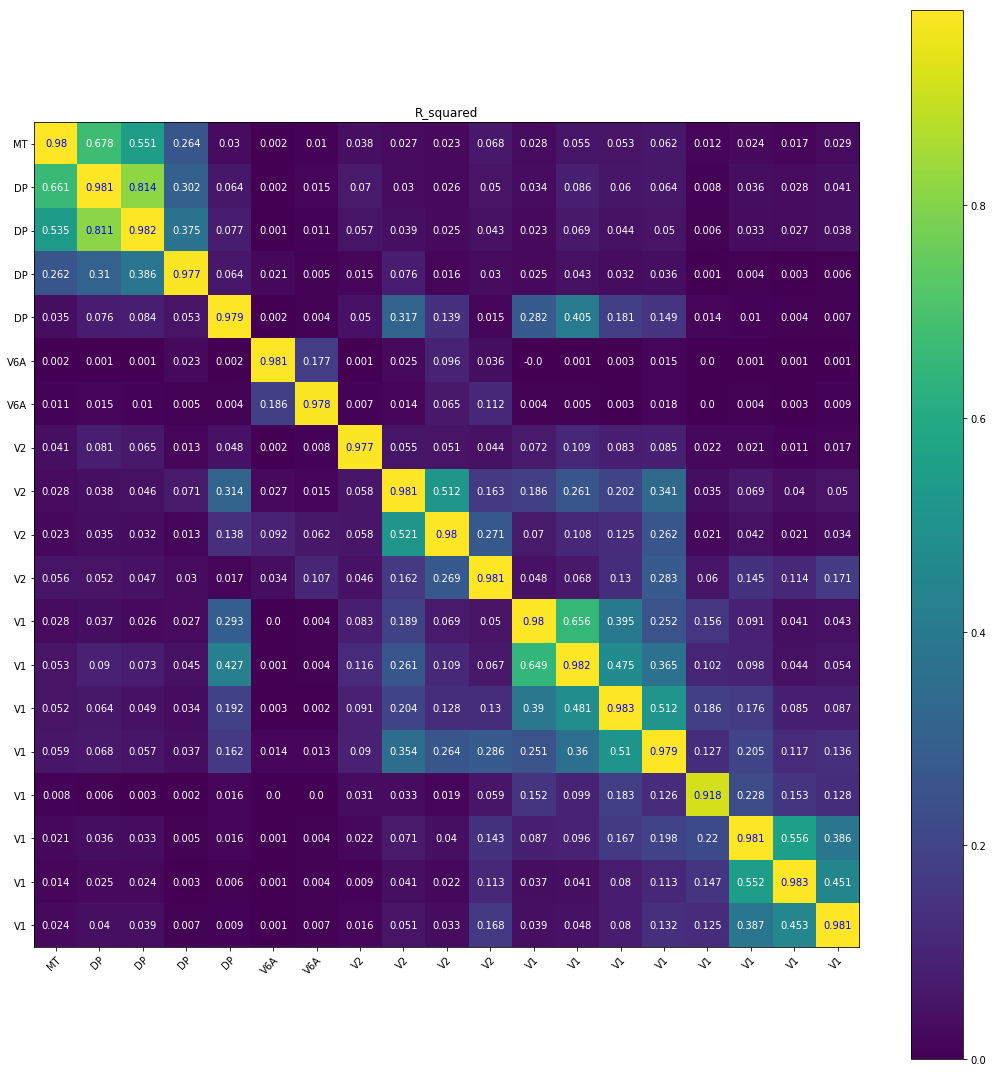

In [29]:
print('from ', cortex1, 'to ', cortex2)
print('from ', lowcut1,'-',highcut1, ' to ',  lowcut2,'-',highcut2, 'Hz')

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(FC)#, vmin=-0.1, vmax=1.0)# cmap='jet')
fig.colorbar(im)


# We want to show all ticks...
ax.set_xticks(np.arange(len(label2)))
ax.set_yticks(np.arange(len(label1)))
# ... and label them with the respective list entries
ax.set_xticklabels(label2)
ax.set_yticklabels(label1)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(label1)):
    for j in range(len(label2)):
        if round(FC[i, j],3) < 0.8* FC.max() :
            
            text = ax.text(j, i, round(FC[i, j],3),
                           ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, round(FC[i, j],3),
                           ha="center", va="center", color="b")
            

ax.set_title("R_squared")
fig.tight_layout()

directory = '/home/rudy/Python2/predictogram/figure/global/'+cortex1+'_to_'+cortex2+'/'
if not os.path.exists(directory):
    os.makedirs(directory)


plt.savefig(directory+'/channel_to_channel_'+cortex1+'_to_'+cortex2+'_low'+str(lowcut1)+'high'+str(highcut1)+'all_signal'+'.jpg')
plt.show()

In [171]:
### R2_time

In [31]:
df_cortex.keys()

Index(['session', 'area1', 'num1', 'area2', 'num2', 'cortex1', 'cortex2',
       'str_freq1', 'str_freq2', 'window_size1', 'window_size2', 'step',
       'n_trial', 'data_size', 'n_chans1', 'n_chans2', 'only_correct_trials',
       'only_align_on_available', 'mse_test', 'mse_train', 'var(y_test)',
       'r2_test', 'r2_error_bar', 'var-mse', 'R2_time', 'time', 'n_iterations',
       'n_epochs', 'size_of_batches', 'learning_rate', 'l2',
       'l2_regularization_penalty', 'kpt', 'keep_prob_train', 'bn', 'DECAY',
       'patch_dim', 'pool_dim', 'nonlin', 'fc_conv', 'fc_central', 'fc_deconv',
       'n_layers', 'channels_in', 'channels_out', 'normalized_weights',
       'weights_dist', 'renorm'],
      dtype='object')

# R2 time

In [30]:
import ast

In [32]:
df_cortex[['area1', 'num2', 'area2', 'num2', 'r2_test', 'R2_time', 'time']]

,area1,num2,area2,num2,r2_test,R2_time,time
0,DP,0,DP,0,0.980939,[0.81287612 0.94398894 0.98701925 ... 0.969450...,"[-806.0, -706.0, -606.0, -506.0, -406.0, -306...."
1,DP,1,DP,1,0.813698,[0.5311916 0.70509644 0.84530016 ... 0.467230...,"[-806.0, -706.0, -606.0, -506.0, -406.0, -306...."
2,DP,2,DP,2,0.301695,[ 0.46771519 -1.4695712 -0.28991734 ... -0.38...,"[-806.0, -706.0, -606.0, -506.0, -406.0, -306...."
3,DP,3,DP,3,0.064355,[ 0.06357513 0.16063928 0.06343542 ... -0.04...,"[-806.0, -706.0, -606.0, -506.0, -406.0, -306...."
4,DP,0,MT,0,0.660637,[-0.25124313 -0.02205094 0.61694276 ... 0.06...,"[-806.0, -706.0, -606.0, -506.0, -406.0, -306...."
5,DP,0,V1,0,0.033767,[ 0.06339274 0.168517 0.13321703 ... 0.01...,"[-806.0, -706.0, -606.0, -506.0, -406.0, -306...."
6,DP,1,V1,1,0.085595,[ 0.09306212 0.19854588 0.00769768 ... -0.04...,"[-806.0, -706.0, -606.0, -506.0, -406.0, -306...."
7,DP,2,V1,2,0.060352,[ 0.00883572 0.12623683 0.19385206 ... -0.10...,"[-806.0, -706.0, -606.0, -506.0, -406.0, -306...."
8,DP,3,V1,3,0.064257,[ 0.02332319 0.09267048 0.14427844 ... -0.01...,"[-806.0, -706.0, -606.0, -506.0, -406.0, -306...."
9,DP,4,V1,4,0.007905,[-0.01617841 -0.00513667 -0.02356748 ... -0.03...,"[-806.0, -706.0, -606.0, -506.0, -406.0, -306...."


In [33]:
time = df_cortex['time'].values[0]

In [36]:
time 

'[-806.0, -706.0, -606.0, -506.0, -406.0, -306.0, -206.0, -106.0, -6.0, 94.0, 194.0, 294.0, 394.0, 494.0, 594.0, 694.0, 794.0, 894.0, 994.0, 1094.0, 1194.0, 1294.0, 1394.0, 1494.0, 1594.0, 3082.0, 3182.0, 3282.0, 3382.0, 3482.0, 3582.0, 3682.0, 3782.0, 3882.0, 3982.0, 4082.0, 4182.0, 4282.0, 4382.0, 4482.0, 4582.0, 4682.0, 4782.0, 4882.0, -828.0, -728.0, -628.0, -528.0, -428.0, -328.0, -228.0, -128.0, -28.0, 72.0, 172.0, 272.0, 372.0, 472.0, 572.0, 672.0, 772.0, 872.0, 972.0, 1072.0, 1172.0, 1272.0, 1372.0, 1472.0, 1572.0, 1672.0, 1772.0, 3019.0, 3119.0, 3219.0, 3319.0, 3419.0, 3519.0, 3619.0, 3719.0, 3819.0, 3919.0, 4019.0, 4119.0, 4219.0, 4319.0, 4419.0, 4519.0, 4619.0, 4719.0, 4819.0, 4919.0, 5019.0, 5119.0, 5219.0, 5319.0, 5419.0, 5519.0, 5619.0, -867.0, -767.0, -667.0, -567.0, -467.0, -367.0, -267.0, -167.0, -67.0, 33.0, 133.0, 233.0, 333.0, 433.0, 533.0, 633.0, 733.0, 833.0, 933.0, 1033.0, 1133.0, 1233.0, 1333.0, 1433.0, 1533.0, 1633.0, 1733.0, 3020.0, 3120.0, 3220.0, 3320.0, 342

In [54]:
split_time = time.split(',')

In [55]:
split_time

['[-806.0',
 ' -706.0',
 ' -606.0',
 ' -506.0',
 ' -406.0',
 ' -306.0',
 ' -206.0',
 ' -106.0',
 ' -6.0',
 ' 94.0',
 ' 194.0',
 ' 294.0',
 ' 394.0',
 ' 494.0',
 ' 594.0',
 ' 694.0',
 ' 794.0',
 ' 894.0',
 ' 994.0',
 ' 1094.0',
 ' 1194.0',
 ' 1294.0',
 ' 1394.0',
 ' 1494.0',
 ' 1594.0',
 ' 3082.0',
 ' 3182.0',
 ' 3282.0',
 ' 3382.0',
 ' 3482.0',
 ' 3582.0',
 ' 3682.0',
 ' 3782.0',
 ' 3882.0',
 ' 3982.0',
 ' 4082.0',
 ' 4182.0',
 ' 4282.0',
 ' 4382.0',
 ' 4482.0',
 ' 4582.0',
 ' 4682.0',
 ' 4782.0',
 ' 4882.0',
 ' -828.0',
 ' -728.0',
 ' -628.0',
 ' -528.0',
 ' -428.0',
 ' -328.0',
 ' -228.0',
 ' -128.0',
 ' -28.0',
 ' 72.0',
 ' 172.0',
 ' 272.0',
 ' 372.0',
 ' 472.0',
 ' 572.0',
 ' 672.0',
 ' 772.0',
 ' 872.0',
 ' 972.0',
 ' 1072.0',
 ' 1172.0',
 ' 1272.0',
 ' 1372.0',
 ' 1472.0',
 ' 1572.0',
 ' 1672.0',
 ' 1772.0',
 ' 3019.0',
 ' 3119.0',
 ' 3219.0',
 ' 3319.0',
 ' 3419.0',
 ' 3519.0',
 ' 3619.0',
 ' 3719.0',
 ' 3819.0',
 ' 3919.0',
 ' 4019.0',
 ' 4119.0',
 ' 4219.0',
 ' 4319.0',
 ' 44

In [84]:
time_list = []
# i = 0
time_list.append( eval(split_time[0][1:]) ) 
for i in range(1, len(split_time)-1):
    if not 'nan' in split_time[i] :
        time_list.append( eval(split_time[i]))
    else:
        time_list.append(np.nan)
#i = -1
time_list.append( eval(split_time[-1][:-1])) 

In [85]:
time_list

[-806.0,
 -706.0,
 -606.0,
 -506.0,
 -406.0,
 -306.0,
 -206.0,
 -106.0,
 -6.0,
 94.0,
 194.0,
 294.0,
 394.0,
 494.0,
 594.0,
 694.0,
 794.0,
 894.0,
 994.0,
 1094.0,
 1194.0,
 1294.0,
 1394.0,
 1494.0,
 1594.0,
 3082.0,
 3182.0,
 3282.0,
 3382.0,
 3482.0,
 3582.0,
 3682.0,
 3782.0,
 3882.0,
 3982.0,
 4082.0,
 4182.0,
 4282.0,
 4382.0,
 4482.0,
 4582.0,
 4682.0,
 4782.0,
 4882.0,
 -828.0,
 -728.0,
 -628.0,
 -528.0,
 -428.0,
 -328.0,
 -228.0,
 -128.0,
 -28.0,
 72.0,
 172.0,
 272.0,
 372.0,
 472.0,
 572.0,
 672.0,
 772.0,
 872.0,
 972.0,
 1072.0,
 1172.0,
 1272.0,
 1372.0,
 1472.0,
 1572.0,
 1672.0,
 1772.0,
 3019.0,
 3119.0,
 3219.0,
 3319.0,
 3419.0,
 3519.0,
 3619.0,
 3719.0,
 3819.0,
 3919.0,
 4019.0,
 4119.0,
 4219.0,
 4319.0,
 4419.0,
 4519.0,
 4619.0,
 4719.0,
 4819.0,
 4919.0,
 5019.0,
 5119.0,
 5219.0,
 5319.0,
 5419.0,
 5519.0,
 5619.0,
 -867.0,
 -767.0,
 -667.0,
 -567.0,
 -467.0,
 -367.0,
 -267.0,
 -167.0,
 -67.0,
 33.0,
 133.0,
 233.0,
 333.0,
 433.0,
 533.0,
 633.0,
 733.0,


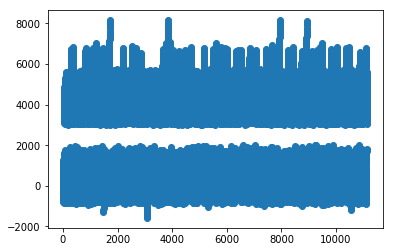

In [86]:
plt.scatter(np.arange(len(time_list)), time_list)

In [88]:
df_cortex.keys()

Index(['session', 'area1', 'num1', 'area2', 'num2', 'cortex1', 'cortex2',
       'str_freq1', 'str_freq2', 'window_size1', 'window_size2', 'step',
       'n_trial', 'data_size', 'n_chans1', 'n_chans2', 'only_correct_trials',
       'only_align_on_available', 'mse_test', 'mse_train', 'var(y_test)',
       'r2_test', 'r2_error_bar', 'var-mse', 'R2_time', 'time', 'n_iterations',
       'n_epochs', 'size_of_batches', 'learning_rate', 'l2',
       'l2_regularization_penalty', 'kpt', 'keep_prob_train', 'bn', 'DECAY',
       'patch_dim', 'pool_dim', 'nonlin', 'fc_conv', 'fc_central', 'fc_deconv',
       'n_layers', 'channels_in', 'channels_out', 'normalized_weights',
       'weights_dist', 'renorm'],
      dtype='object')

In [89]:
r2_time =df_cortex['R2_time'].values[0]

In [90]:
r2_time

'[0.81287612 0.94398894 0.98701925 ... 0.96945051 0.94621502 0.96982268]'

In [100]:
for el in r2_time :
    print(el)

[
0
.
8
1
2
8
7
6
1
2
 
0
.
9
4
3
9
8
8
9
4
 
0
.
9
8
7
0
1
9
2
5
 
.
.
.
 
0
.
9
6
9
4
5
0
5
1
 
0
.
9
4
6
2
1
5
0
2
 
0
.
9
6
9
8
2
2
6
8
]


In [93]:
r2_time_split_str = r2_time.split(" ")

In [94]:
r2_time_split_str

['[0.81287612',
 '0.94398894',
 '0.98701925',
 '...',
 '0.96945051',
 '0.94621502',
 '0.96982268]']

In [95]:
r2_time_list = []
# i=0
r2_time_list.append( eval( r2_time_split_str[0][1:] ))
for i in range(1, len(r2_time_split_str)-1):
    r2_time_list.append( eval( r2_time_split_str[i] ))
    
r2_time_list.append( eval( r2_time_split_str[-1][:-1]))

    

In [98]:
len( r2_time_split_str)

7

In [97]:
len( r2_time_list)

7

In [175]:
target1 = collections.Counter(io.get_area_cortex(rinfo_path, cortex1, unique = False))
target2 = collections.Counter(io.get_area_cortex(rinfo_path, cortex2, unique = False))

label1 = []
for area1 in target1 :
    for count1 in range(target1[area1]):
        label1.append(area1)
        
label2 = []
for area2 in target2 :
    for count2 in range(target2[area2]):
        label2.append(area2)
        
print(label1)
print(label2)

print(len(label1))
print(len(label2))


FC_step = np.zeros( (len(label1), len(label2), 5))

i=0

for area1 in target1 :
    for count1 in range(target1[area1]):
        j=0
        for area2 in target2 :
            for count2 in range(target2[area2]):
                
                r = df_cortex[ (df_cortex['area1'] == area1) & (df_cortex['num1'] == count1) & (df_cortex['area2'] == area2) & (df_cortex['num2'] == count2)]['R2_time'].values
    
                if len(r) > 0 :
#                     print(i,j)
#                     print( ast.literal_eval(r[0]) )
                    r_time = ast.literal_eval(r[0])
                    for n_step in range(len(r_time)) :
            
                        FC_step[i,j, n_step] = r_time[n_step]
    
                else :
                    print(area1, area2)
                    
                
                j+=1
        i+=1
        
                

['MT', 'DP', 'DP', 'DP', 'DP', 'V6A', 'V6A', 'V2', 'V2', 'V2', 'V2', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1']
['a46V', 'a24c', 'a46D', 'a9/46D', 'a8M', 'a8M', 'a8r', 'a44', 'a8L', 'a8L']
19
10


In [176]:
label2

['a46V', 'a24c', 'a46D', 'a9/46D', 'a8M', 'a8M', 'a8r', 'a44', 'a8L', 'a8L']

In [177]:
FC_step.shape

(19, 10, 5)

from  Visual to  Prefontal
from  8 - 14  to  8 - 14 Hz
sample -600 -400


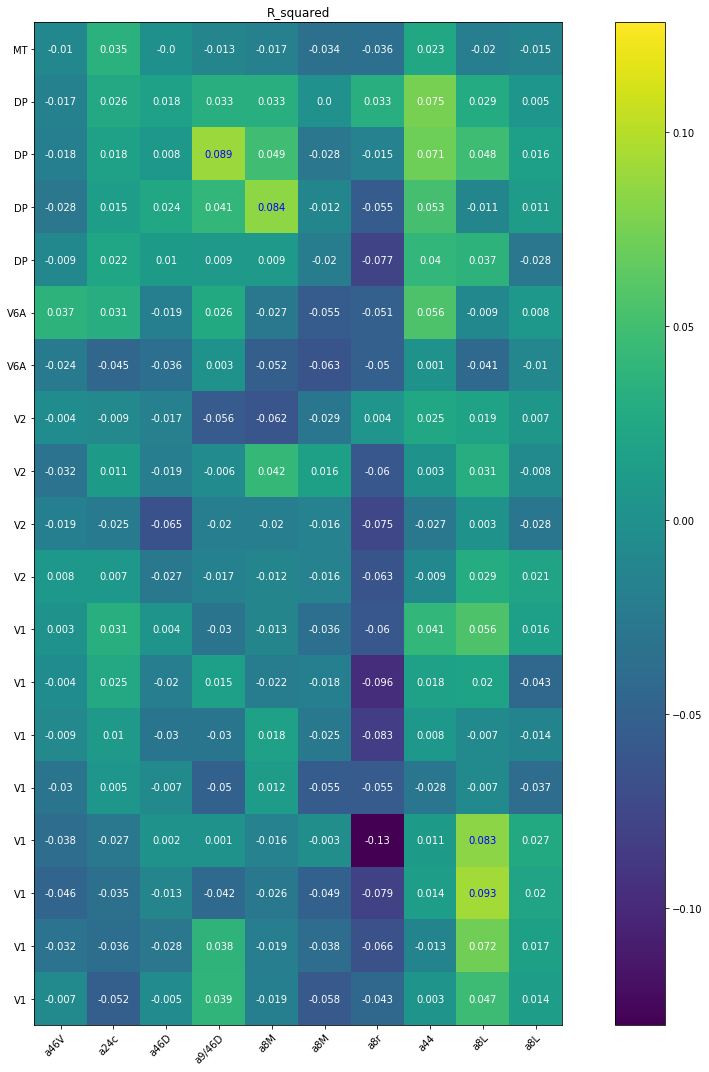

sample -500 -300


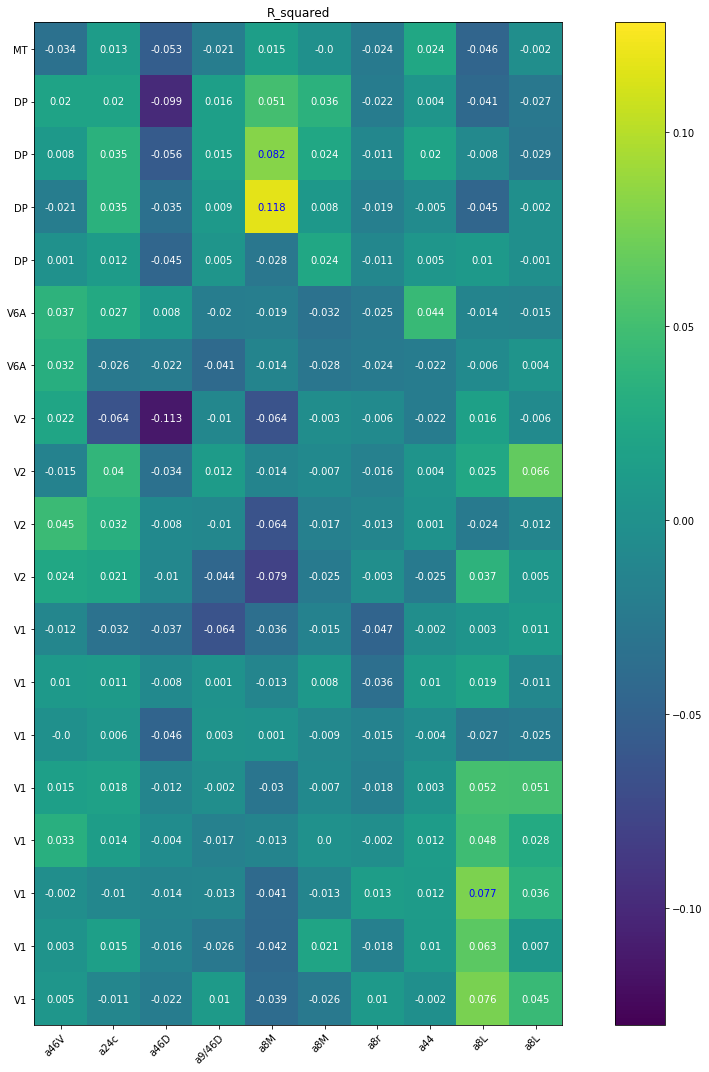

sample -400 -200


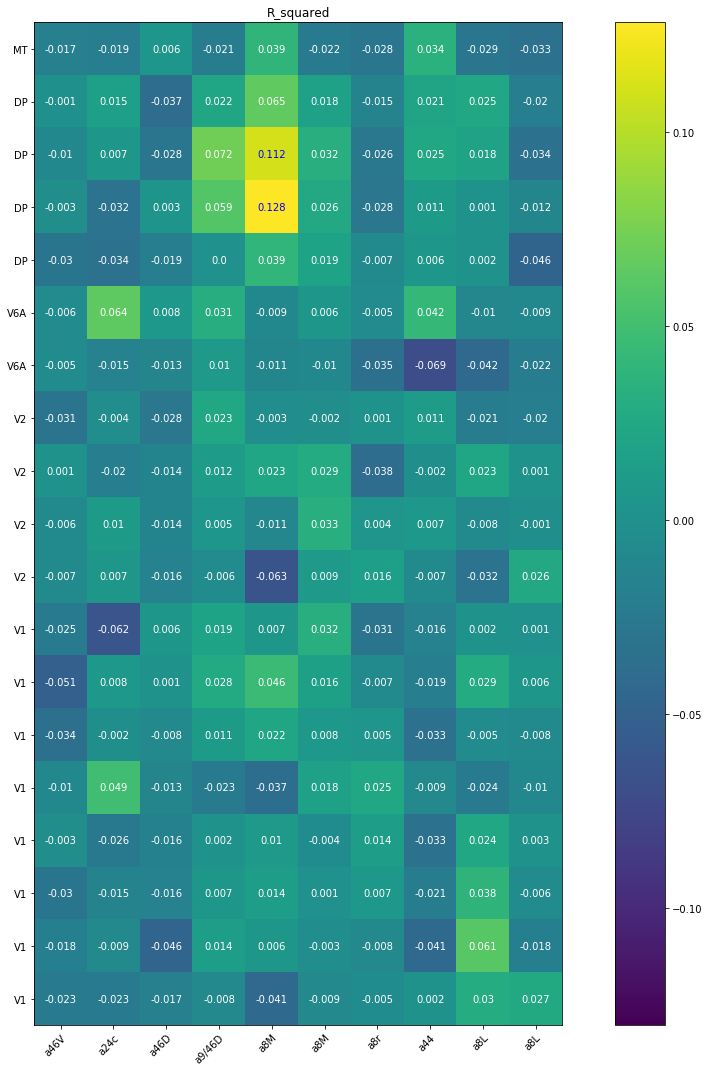

sample -300 -100


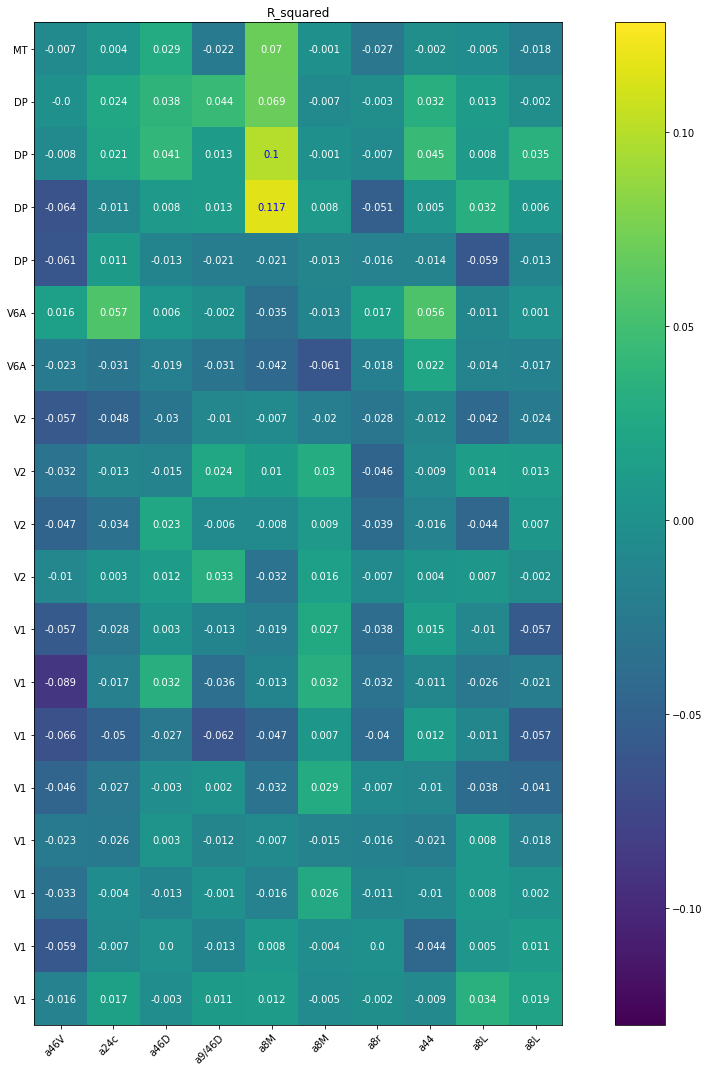

sample -200 0


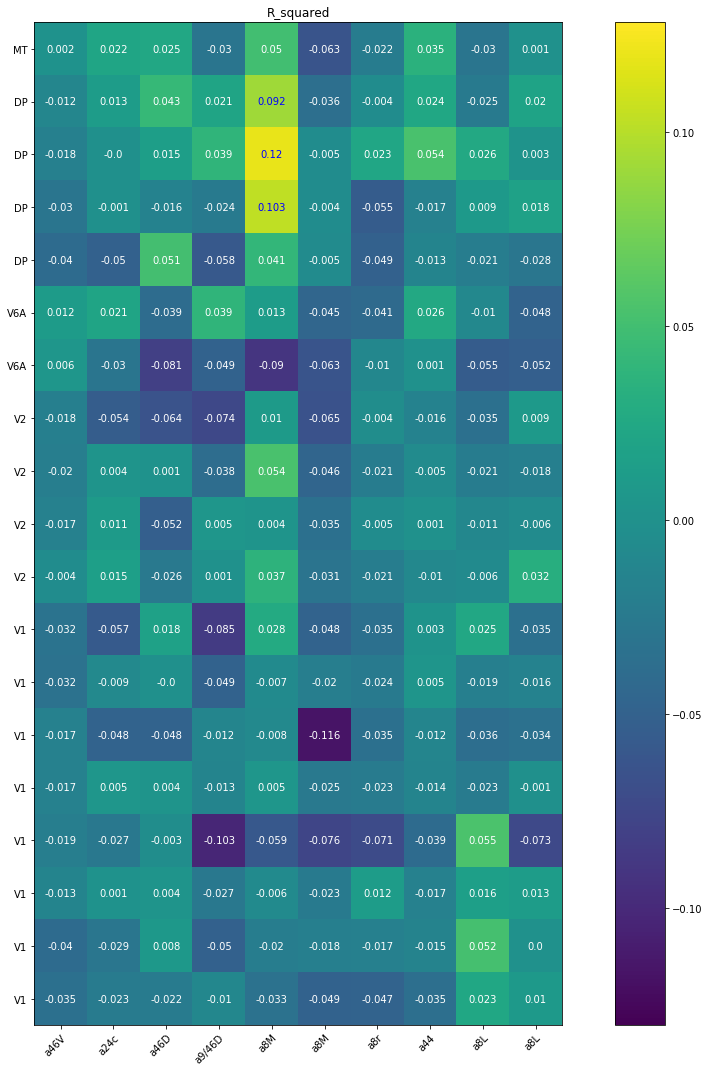

In [178]:
print('from ', cortex1, 'to ', cortex2)
print('from ', lowcut1,'-',highcut1, ' to ',  lowcut2,'-',highcut2, 'Hz')

for n_step in range( FC_step.shape[2]):
    FC_plot = FC_step[:,:,n_step]
    
    print(align_on2, from_time2 + step*n_step, from_time2 + step*n_step + window_size1) 
    

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(FC_plot, vmin=FC_step.min(), vmax=FC_step.max())# cmap='jet')
    fig.colorbar(im)


    # We want to show all ticks...
    ax.set_xticks(np.arange(len(label2)))
    ax.set_yticks(np.arange(len(label1)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(label2)
    ax.set_yticklabels(label1)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(label1)):
        for j in range(len(label2)):
            if round(FC_plot[i, j],3) < FC_step.min() + 0.8* (FC_step.max()-FC_step.min()) :

                text = ax.text(j, i, round(FC_plot[i, j],3),
                               ha="center", va="center", color="w")
            else:
                text = ax.text(j, i, round(FC_plot[i, j],3),
                               ha="center", va="center", color="b")


    ax.set_title("R_squared")
    fig.tight_layout()
    directory = '/home/rudy/Python2/auto_encodeur_with_stimulus/figure/time/'+cortex1+'_to_'+cortex2+'/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    plt.savefig('/home/rudy/Python2/auto_encodeur_with_stimulus/figure/time/'+cortex1+'_to_'+cortex2+'/channel_to_channel_'+cortex1+'_to_'+cortex2+'_low'+str(lowcut1)+'high'+str(highcut1)+'align_on'+str(align_on1)+'from_time'+str(from_time1 + step*n_step)+'to_time'+str(from_time1 + step*n_step + window_size1)+'.jpg')
    plt.show()